In [2]:
import os 
hostlist = ["52.187.203.128",
"52.185.168.78",
"137.135.48.92",
"13.70.63.210",
"52.187.107.171",
"52.228.42.120",
"104.41.26.234",

"52.183.72.143",
"13.90.225.75",
"137.116.46.241",
"104.41.230.36",
"104.40.194.88",
"51.140.230.85",
"20.188.46.100",
"20.188.44.40",
"104.43.250.39",
"23.100.105.252",
"104.211.163.249",
"13.76.255.49",
"52.231.90.199"]
            
all_files = os.listdir("data_colleted4/run7_chord")
logs = filter(lambda x: x[-4:] == '.log', all_files)
seqthnmap = dict()
seqlist = []
for filename in logs:
    #print(filename)
    file = open(os.path.join("data_colleted4/run7_chord",filename),'r')
    
    for line in file.readlines():
        data = line.strip().split(";")
        seq = int(data[0])
        if seq in [0]:
            continue
        if seq not in seqlist:
            seqlist.append(seq)
            seqthnmap[seq] = dict()
            
        tandhn = data[1:] #remove sequence
        for thn in tandhn:
            thnmap = {}
            t, hn = thn.split(",") # time and hostname
            t = int(t)
            thnmap[hn] = t
            seqthnmap[seq].update(thnmap)
    file.close()
    
file = open('run_7_logmap.txt', 'w')
for line in seqthnmap:
    file.write(str(line)+': '+str(seqthnmap[line])+'\n')
file.close()



In [3]:
import numpy as np
x = np.zeros((seq,20))
for line in seqthnmap:
    #print(list(seqthnmap[line].values()))
    x[line-1] = np.array(list(seqthnmap[line].values()))-min(seqthnmap[line].values())

print(seq)
print(x.shape)

110
(110, 20)


In [4]:
m,n = x.shape
print("average latency =", np.mean(x))
      #sum(sum(x))/(m*n))
print("Std deviation =", np.std(x))

average latency = 1070000280.2136364
Std deviation = 657551174.1821134


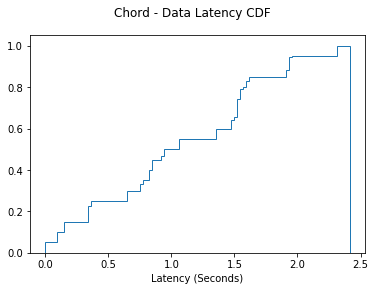

In [7]:
from matplotlib import pyplot as plt

n, bins, patches = plt.hist((x/1e9).ravel().tolist(), 100, density=True, histtype='step',
                           cumulative=True, label='Empirical')
plt.suptitle('Chord - Data Latency CDF')
plt.xlabel('Latency (Seconds)')
plt.show()



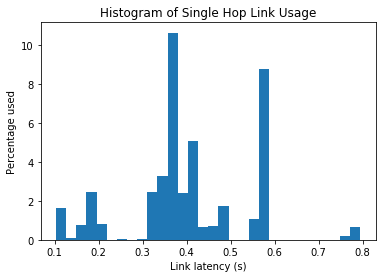

In [8]:
linkDict = {}

all_files = os.listdir("data_colleted4/run7_chord")
logs = filter(lambda x: x[-4:] == '.log', all_files)
for filename in logs:
    #print(filename)
    file = open(os.path.join("data_colleted4/run7_chord",filename),'r')
    
    for line in file.readlines():
        data = line.strip().split(";")
        
        LinkList = []
        tandhn = data[1:] #remove sequence
        for thn in tandhn:
            thnmap = {}
            t, hn = thn.split(",") # time and hostname
            t = int(t)
            thnmap[hn] = t
            LinkList.append((hn, t))
        #print(LinkList)
        
        for i in range(1, len(LinkList)):
            h1, t1 = LinkList[i-1]
            h2, t2 = LinkList[i]
            key = h2 + "." + h1
            val = t2 - t1
            #print(key, val)
            if key not in linkDict.keys():
                linkDict[key] = []
            linkDict[key].append(val)
    file.close()

    
#print(linkDict)
all_lat = []
for k in linkDict:
    all_lat = all_lat + linkDict[k]

all_lat = [x/1e9 for x in all_lat]
    
plt.hist(all_lat, 30, density = True)
plt.title('Histogram of Single Hop Link Usage')
plt.ylabel('Percentage used')
plt.xlabel('Link latency (s)')
plt.show()


202966925.19155845
